<a href="https://colab.research.google.com/github/Educat8n/Invited_Talks/blob/master/ODSC-West-2022/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## import packages
import tensorflow.keras as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, add, Embedding, Conv2DTranspose, GlobalMaxPooling2D, Input, UpSampling2D, Reshape, average

In [ ]:
encoder_input = Input(shape=(28, 28, 1), name="original_img")
x = Conv2D(16, 3, activation="relu")(encoder_input)
x = Conv2D(32, 3, activation="relu")(x)
x = MaxPooling2D(3)(x)
x = Conv2D(32, 3, activation="relu")(x)
x = Conv2D(16, 3, activation="relu")(x)
encoder_output = GlobalMaxPooling2D()(x)

encoder = Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

decoder_input = Input(shape=(16,), name="encoded_img")
x = Reshape((4, 4, 1))(decoder_input)
x = Conv2DTranspose(16, 3, activation="relu")(x)
x = Conv2DTranspose(32, 3, activation="relu")(x)
x = UpSampling2D(3)(x)
x = Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = Conv2DTranspose(1, 3, activation="relu")(x)

decoder = Model(decoder_input, decoder_output, name="decoder")
decoder.summary()


autoencoder_input = Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 original_img (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          4624      
                                                           

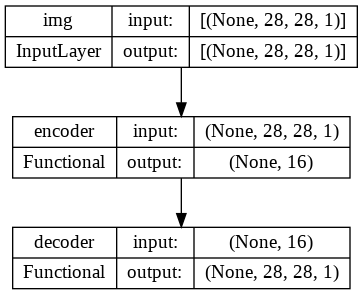

In [ ]:
K.utils.plot_model(autoencoder, "autoencoder.png", show_shapes=True)